In [1]:
# Import the os module
import os

# Get the current working directory, set it to HOME, and print it
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [2]:
# Change the current directory to the previously defined HOME
%cd {HOME}

# Clone the GroundingDINO repository from GitHub
!git clone https://github.com/IDEA-Research/GroundingDINO.git

# Create and change the directory to the GroundingDINO folder
%cd {HOME}/GroundingDINO

# Checkout a specific commit in the GroundingDINO repository
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251

# Install the GroundingDINO package in editable mode
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 443 (delta 156), reused 138 (delta 129), pack-reused 233
Receiving objects: 100% (443/443), 12.86 MiB | 11.29 MiB/s, done.
Resolving deltas: 100% (228/228), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.0 MB/s eta 0:00:00


In [3]:
# Change back to the HOME directory
%cd {HOME}

# Import the sys module
import sys

# Install the Segment Anything Model (SAM) package from GitHub
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-pvpuwvym
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-pvpuwvym
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=dcfe5976b22efb93d789f1f4b28ca70fe3a5684b1aee2fc80d5ce07abfdd1077
  Stored in directory: /tmp/pip-ephem-wheel-cache-8usf31lw/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [4]:
# Uninstall the supervision package if it exists and reinstall v0.6.0
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

# Import the supervision package, and print its version to ensure correct installation
import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [5]:
import os

# Define the path to the GroundingDINO configuration file and check its existence
GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [6]:
# Change back to the HOME directory
%cd {HOME}

# Create a weights directory if it doesn't exist
!mkdir -p {HOME}/weights

# Change to the weights directory
%cd {HOME}/weights

# Download the GroundingDINO model checkpoint file
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [7]:
import os

# Define the path to the GroundingDINO model checkpoint file and check its existence
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [8]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

# Download the SAM model checkpoint file
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [9]:
import os

# Define the path to the SAM model checkpoint file and check its existence
SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [10]:
# Import the torch module and set the device to GPU if available, otherwise CPU
import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
# Change to the GroundingDINO directory
%cd {HOME}/GroundingDINO

# Import the GroundingDINO Model class and create a model instance using the configuration and checkpoint
from groundingdino.util.inference import Model
grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
# Define the version of the SAM encoder to use
SAM_ENCODER_VERSION = "vit_h"

In [13]:
# Import the SAM model registry and predictor
from segment_anything import sam_model_registry, SamPredictor

# Create a SAM predictor instance
sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [14]:
f"{HOME}/data"

'/content/data'

In [15]:
# Change back to the HOME directory
%cd {HOME}

# Create a data directory if it doesn't exist
!mkdir {HOME}/data

# Change to the data directory
%cd {HOME}/data

# Download multiple images into the data directory
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_01.jpeg?raw=true
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_02.jpeg?raw=true
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_03.jpeg?raw=true
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_04.jpeg?raw=true
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_05.jpeg?raw=true
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_06.jpeg?raw=true
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_07.jpeg?raw=true
!wget -q https://github.com/TheRealMagical/images/blob/main/Pic_08.jpeg?raw=true

/content
/content/data


## **Image 1**

In [16]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_01.jpeg?raw=true"
CLASSES = ['cabinet', 'step ladder', 'tea cup', 'outlet', 'paint can', 'ceiling light']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## **Image 2**

In [17]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_02.jpeg?raw=true"
CLASSES = ['chipped paint', 'window', 'door', 'light switch', 'grass', 'bush']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## **Image 3**

In [18]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_03.jpeg?raw=true"
CLASSES = ['door', 'radiator', 'light switch', 'door hook', 'floor', 'mat']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## **Image 4**

In [19]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_04.jpeg?raw=true"
CLASSES = ['laundry machine', 'dryer', 'shoe', 'ladder', 'outlet']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## **Image 5**

In [20]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_05.jpeg?raw=true"
CLASSES = ['door', 'vent', 'door hook']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## **Image 6**

In [21]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_06.jpeg?raw=true"
CLASSES = ['door', 'door hinge', 'cracked paint']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## **Image 7**

In [22]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_07.jpeg?raw=true"
CLASSES = ['door', 'tea cup', 'paint can', 'dryer', 'light switch',
           'cabinet', 'bush', 'handle']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

## **Image 8**

In [23]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Pic_08.jpeg?raw=true"
CLASSES = ['light switch', 'door', 'door handle', 'chair', 'stairs', 'table']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [24]:
from typing import List

# Define a function to enhance class names by adding "all " prefix and pluralizing
def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1052: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


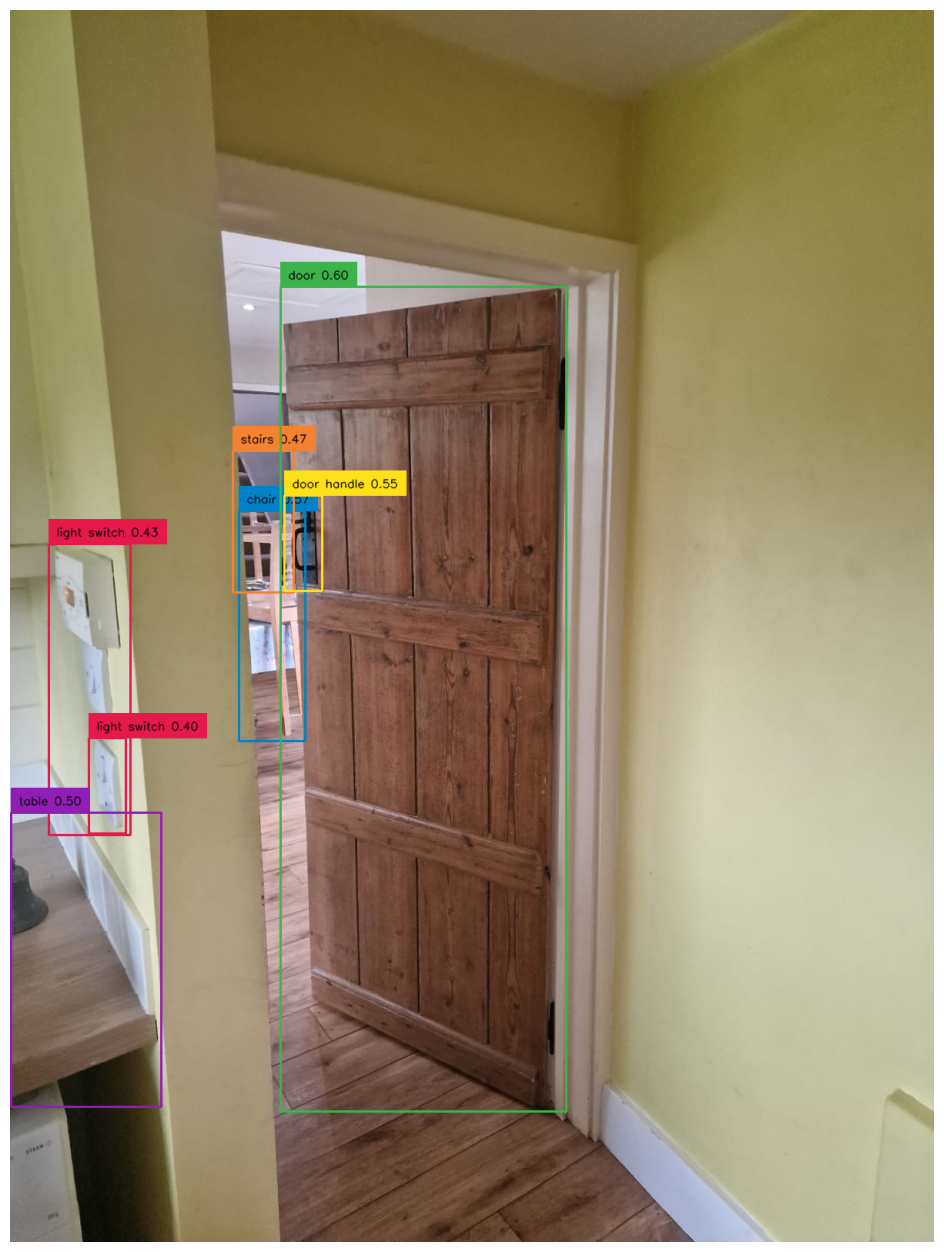

In [25]:
# Import OpenCV and supervision for image processing and annotation
import cv2
import supervision as sv

# Load the image
image = cv2.imread(SOURCE_IMAGE_PATH)

# Detect objects in the image using GroundingDINO model
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# Annotate the image with detections using supervision's BoxAnnotator
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Display the annotated image inline using matplotlib
%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [26]:
import numpy as np
from segment_anything import SamPredictor

# Define a function to segment objects in the image using SAM predictor
def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

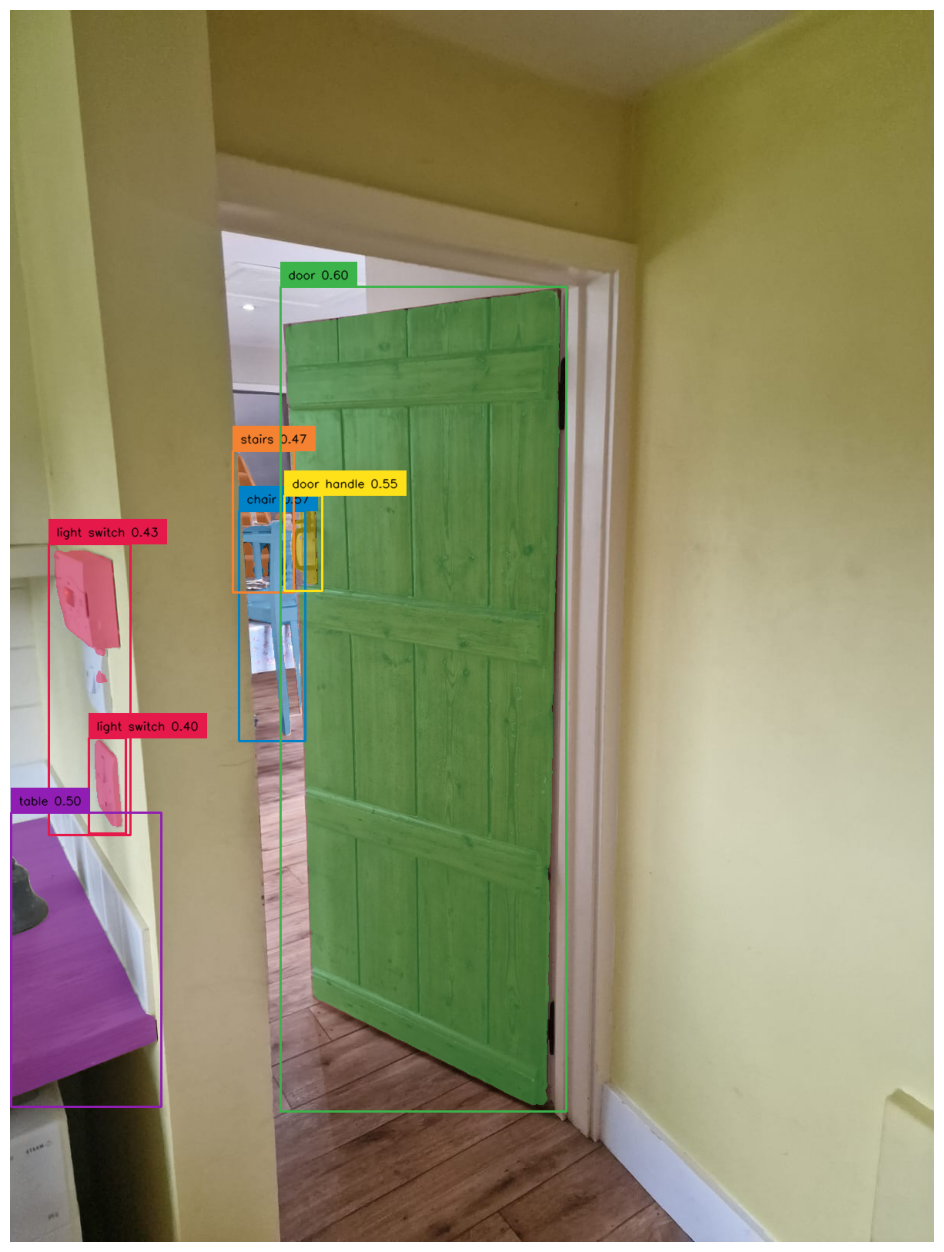

In [27]:
import cv2

# Convert detections to masks using the segment function
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

# Annotate the image with detection boxes and masks
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

# Display the annotated image with masks inline using matplotlib
%matplotlib inline
sv.plot_image(annotated_image, (16, 16))

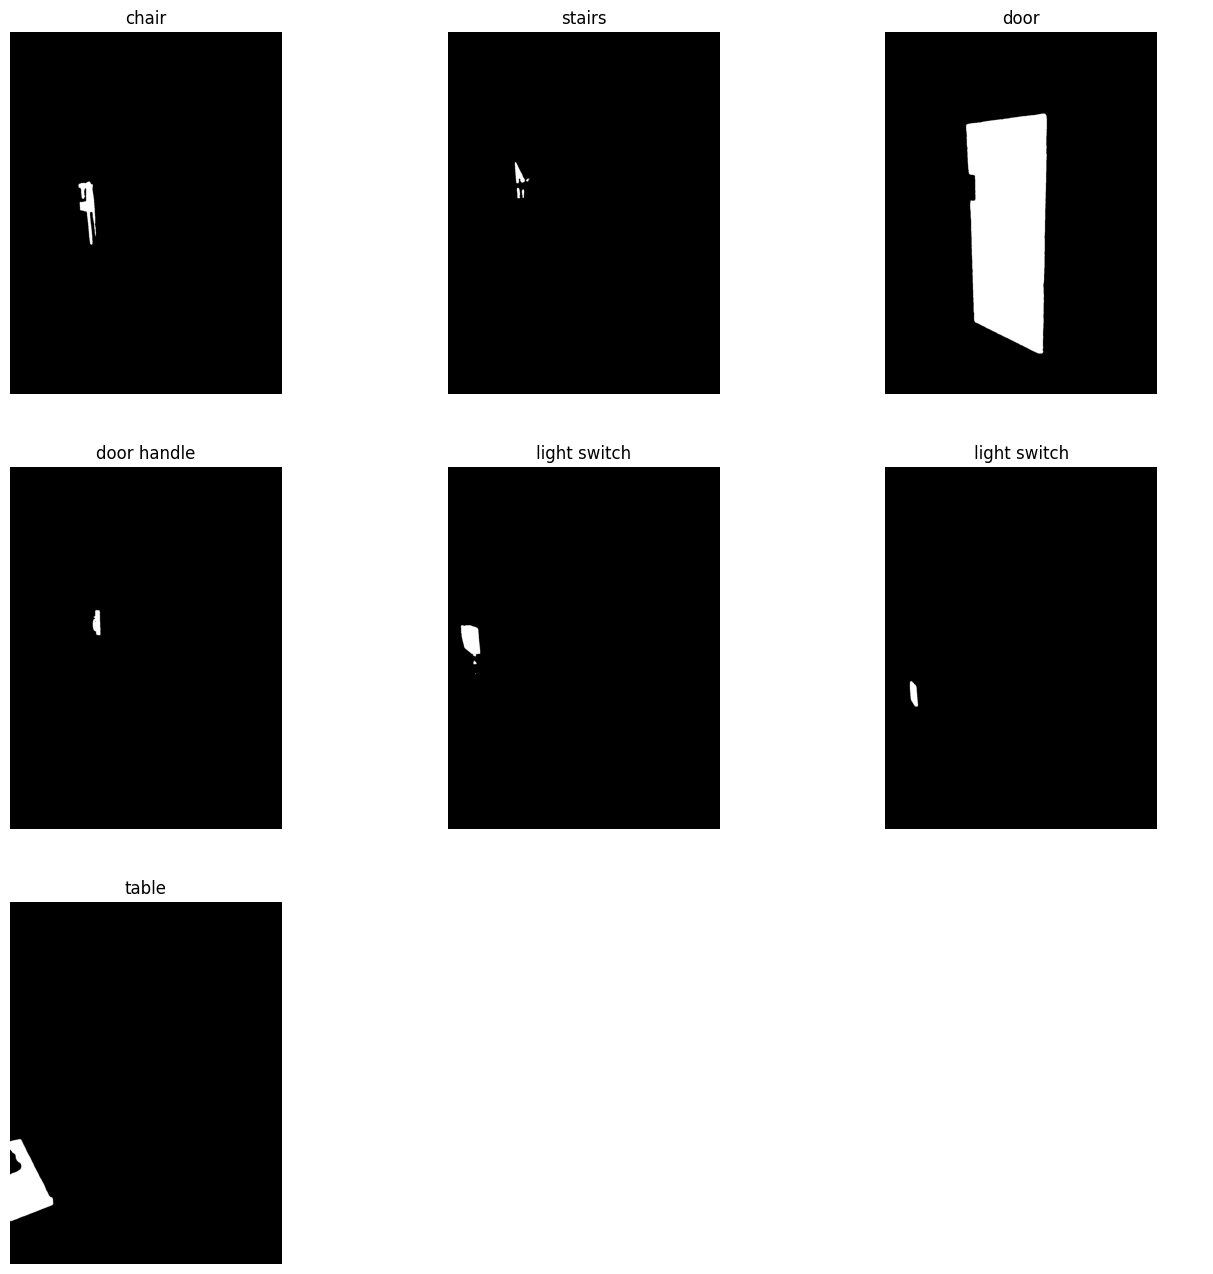

In [28]:
import math

# Calculate the grid size for displaying masks in a grid layout
grid_size_dimension = math.ceil(math.sqrt(len(detections.mask)))

# Prepare titles for each mask
titles = [
    CLASSES[class_id]
    for class_id
    in detections.class_id
]

# Display the masks in a grid layout
sv.plot_images_grid(
    images=detections.mask,
    titles=titles,
    grid_size=(grid_size_dimension, grid_size_dimension),
    size=(16, 16)
)

In [41]:
import os
# Define the directory and extensions for the images to be processed
IMAGES_DIRECTORY = os.path.join(HOME, 'data')
print(os.path.isdir(IMAGES_DIRECTORY))
print(os.listdir(IMAGES_DIRECTORY))
IMAGES_EXTENSIONS = ['jpeg?raw=true']

# Define the classes, box threshold, and text threshold for object detection
CLASSES = ['ceiling light', 'cabinet', 'wall outlet', 'paint can', 'tea cup', 'step ladder',
           'glazing', 'light switch', 'chipped paint', 'door', 'hinge', 'door handle',
           'door hook', 'coat hook', 'radiator', 'mat', 'dryer', 'washing machine', 'shoes',
           'dog door', 'stairs', 'chair', 'table']
BOX_TRESHOLD = 0.50
TEXT_TRESHOLD = 0.25

True
['Pic_06.jpeg?raw=true', 'Pic_05.jpeg?raw=true', 'Pic_01.jpeg?raw=true', 'Pic_02.jpeg?raw=true', 'Pic_03.jpeg?raw=true', 'Pic_07.jpeg?raw=true', 'Pic_08.jpeg?raw=true', 'Pic_04.jpeg?raw=true']


In [43]:
# Import OpenCV and tqdm for image processing and progress tracking
import cv2
from tqdm.notebook import tqdm

# Initialize dictionaries to store images and annotations
images = {}
annotations = {}

# List all image files in the directory with the specified extensions
image_paths = sv.list_files_with_extensions(
    directory=IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

# Process each image file
for image_path in tqdm(image_paths):
    image_name = image_path.name
    image_path = str(image_path)
    image = cv2.imread(image_path)

    # Detect objects in the image using GroundingDINO model
    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )

    detections = detections[detections.class_id != None]

    # Convert detections to masks using the segment function
    detections.mask = segment(
        sam_predictor=sam_predictor,
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        xyxy=detections.xyxy
    )

    # Store the image and its annotations
    images[image_name] = image
    annotations[image_name] = detections

  0%|          | 0/8 [00:00<?, ?it/s]

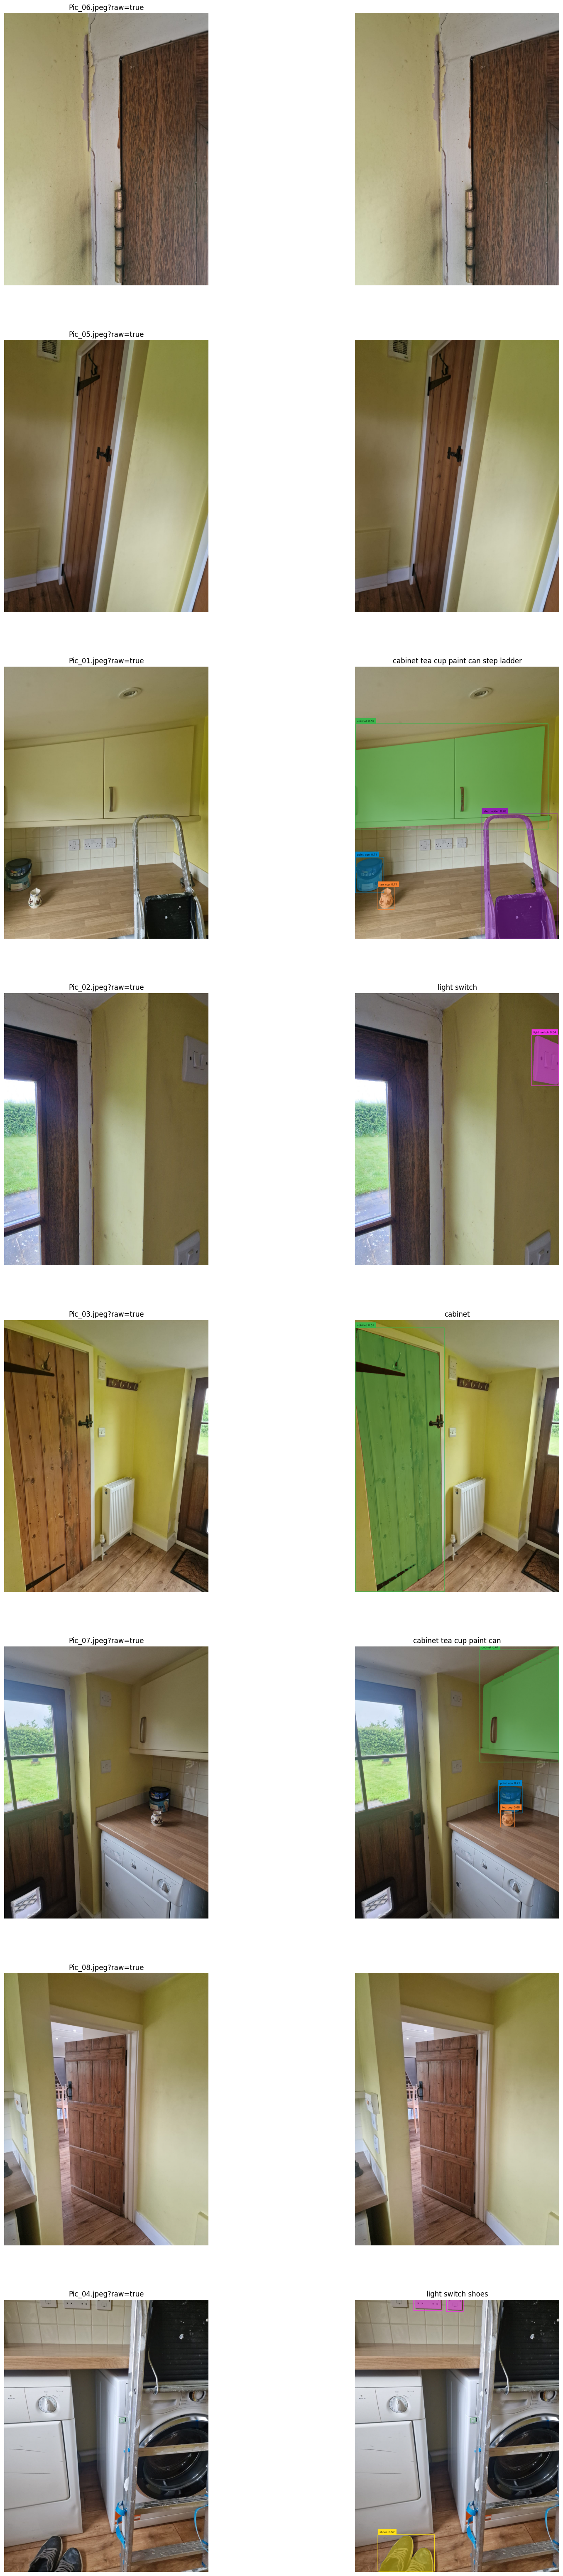

In [44]:
# Initialize lists to store images and titles for plotting
plot_images = []
plot_titles = []

# Initialize annotators for boxes and masks
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

# Process each image and its annotations for plotting
for image_name, detections in annotations.items():
    image = images[image_name]
    plot_images.append(image)
    plot_titles.append(image_name)

    # Prepare labels for the detections
    labels = [
        f"{CLASSES[class_id]} {confidence:0.2f}"
        for _, _, confidence, class_id, _
        in detections]

    # Annotate the image with detection boxes and masks
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

    # Store the annotated image and its title
    plot_images.append(annotated_image)
    title = " ".join(set([
        CLASSES[class_id]
        for class_id
        in detections.class_id
    ]))
    plot_titles.append(title)

# Display the images and annotations in a grid layout
sv.plot_images_grid(
    images=plot_images,
    titles=plot_titles,
    grid_size=(len(annotations), 2),
    size=(2 * 10, len(annotations) * 10)
)